### IDs:
Insert yours IDs to the cell below

ID #1: 312146343

ID #2: 806761


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from feature_engine.selection import DropCorrelatedFeatures

sns.set()

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. Describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [62]:
from sklearn.datasets import load_boston
boston = load_boston()

df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

/dsp/anaconda3/envs/python_3.8.1_tensorflow/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [63]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


How many samples does it contain?

In [64]:
len(df)

506

What isis the data type for each variable?

In [65]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

Produce a histogram of the nitric oxides concentration.

<AxesSubplot:xlabel='NOX', ylabel='Count'>

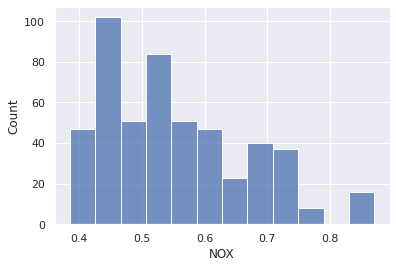

In [66]:
sns.histplot(data = df, x = 'NOX')

Produce a boxplot of the nitric oxides concentration.

<AxesSubplot:xlabel='NOX'>

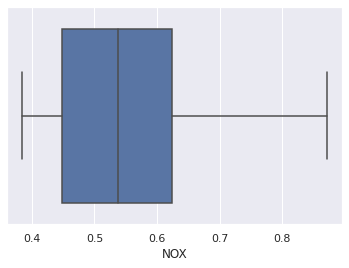

In [67]:
sns.boxplot(data = df, x = 'NOX')

Produce a correlation matrix of all the features:

<AxesSubplot:>

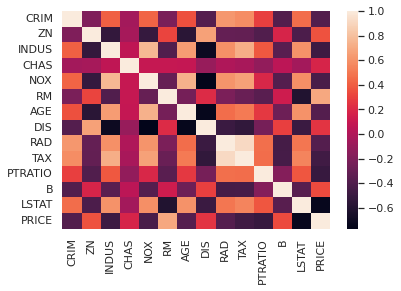

In [68]:
sns.heatmap(df.corr())

We can find the correlative features:

In [69]:
tr = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.75)

Xt = tr.fit_transform(df)

tr.correlated_feature_sets_

[{'INDUS', 'NOX'}, {'RAD', 'TAX'}]

Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot).

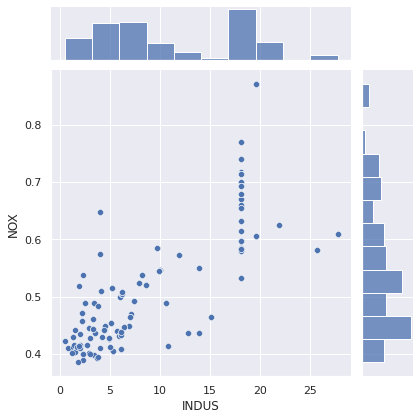

In [70]:
sns.jointplot(data=df, x="INDUS", y="NOX")

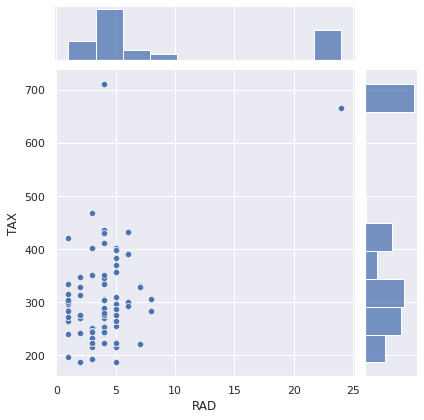

In [71]:
sns.jointplot(data=df, x="RAD", y="TAX")

Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)

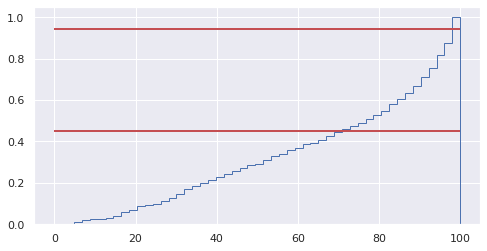

In [72]:
quantiles = df['AGE'].quantile([0.25,0.75])
q1 = quantiles.values[0]
q3 = quantiles.values[1]

fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(df['AGE'], 50, density=True, histtype='step',
                           cumulative=True, label='Empirical')
ax.hlines(y=q1/100, xmin=0, xmax=100, linewidth=2, color='r')
ax.hlines(y=q3/100, xmin=0, xmax=100, linewidth=2, color='r')

Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)

Identify and report 2 “interesting” trends in the data. No need to provide statistical confideFirst interesting point: features have a correlation to the targetnce at this point.

First interesting point: features have a correlation to the target!

To test this, We will test the mean_squared_error of random forest model VS mean of random guess 20 times.

random guess:

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(df.drop('PRICE', axis = 1), df['PRICE'], test_size=0.33, random_state=42)
rg_mse = np.mean([mean_squared_error(y_test, np.random.randint(0, max(df['PRICE']), len(X_test))) for i in range(20)])
rg_mse

295.9054491017964

random forest:

In [117]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_mse = mean_squared_error(y_test, rf.predict(X_test))
rf_mse

9.997365832335323

In [118]:
rg_mse/rf_mse

29.598341609619254

It can see that the correlation is 29 times higher than an average random guess

The second interesting point: Half the correlation to the target is mainly based on only two features only!

In [99]:
fi = pd.DataFrame(dict(zip(list(X_test.columns),list(rf.feature_importances_))), index=['feature_importances']).T.sort_values(by = 'feature_importances')
fi

,feature_importances
CHAS,0.000930
ZN,0.003241
RAD,0.004324
INDUS,0.007572
NOX,0.011769
B,0.013160
TAX,0.013592
AGE,0.014149
PTRATIO,0.018339
CRIM,0.033414


In [104]:
list_most_feature_importances = list(fi.loc[fi['feature_importances']>0.1].index)
list_most_feature_importances

['RM', 'LSTAT']

In [119]:
rf = RandomForestRegressor()
rf.fit(X_train[list_most_feature_importances], y_train)
rf_fi_mse = mean_squared_error(y_test, rf.predict(X_test[list_most_feature_importances]))

In [120]:
rg_mse/rf_fi_mse

14.078292540336896

It can see that the correlation is 14 times higher than an average random guess

Using all the features resulted in a double result in only two

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=4$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

#### 2.D
Give an example for a joint distribution of $\ U, V \ $ and $W$ where $U$ and $V$ are NOT conditionally independent given $W$, but $U$ and $V$ are (unconditionally) independent. Also: $U$ and $V$ are standard normally distributed ($N(0, 1)$) and $W$ is a coin (2 possible values).

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 75,000 RCU and a standard deviation of 37,500 RCU.

In [ ]:
u = 75000
std = 37500
dist = stats.norm(loc=u, scale=std)

#### 4.A
What percent of people earn less than 50,000 RCU?

In [ ]:
dist.cdf(50000)

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [ ]:
dist.cdf(65000) - dist.cdf(45000)

#### 4.C
What percent of people earn more than 85,000 RCU?

In [ ]:
1 - dist.cdf(85000)

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [ ]:
(1 - dist.cdf(140000))*1000

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [ ]:
def H(n):
    H = 0
    for i in range(1, n+1):
        H = H + 1/i
    return H

In [ ]:
def exp_Tn(N):
    return N*H(N)

In [ ]:
exp_Tn(100)

#### 5.B
Write code to compute the exact value of $V(T_{N})$

Since coupon collection are independent, we have:  
$$V(T_{N})=V(X_{1}+X_{2}+...+X_{n})=\sum_{i=0}^{N}V(X_{i})$$  
$$X_{i}\sim G(p), V(X_{i})=\frac{1-p}{p^2},p=\frac{N-i+1}{N}$$  

In [ ]:
def var_Tn(N):
    var = 0
    for i in range(1, N+1):
        p=(N-i+1)/N
        var = var + (1-p)/(p)**2
    return var

In [ ]:
var_Tn(56)

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

#### 5.D
Let $S_N$ denote the waiting time until $N/2$ different coupons are collected.

Write code to exactly compute $P(S_{30}>60)$